# CP-322 Mini Project 2

# Imports

In [1]:
#pip install nltk
#nltk.download()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import html
import unicodedata
import string
import nltk
from pathlib import Path
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
stop_words = stopwords.words('english')

#loading 20 news groups dataset
from sklearn.datasets import fetch_20newsgroups

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold

#importing logistic regression
from sklearn.linear_model import LogisticRegression
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#importing linear svc
from sklearn.svm import LinearSVC
#importing ada boost
from sklearn.ensemble import AdaBoostClassifier
#importing random forest
from sklearn.ensemble import RandomForestClassifier

#categories for 20 news groups dataset
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)

In [4]:
print("First 5 training data categories:")
for t in twenty_train.target[:5]:
    print(f"{twenty_train.target_names[t]} ({t})")
print("-" * 30)
# Visualize the first 10 testing data entries
print("First 5 testing data categories:")
for t in twenty_test.target[:5]:
    print(f"{twenty_test.target_names[t]} ({t})")

First 5 training data categories:
rec.autos (7)
comp.sys.mac.hardware (4)
comp.sys.mac.hardware (4)
comp.graphics (1)
sci.space (14)
------------------------------
First 5 testing data categories:
rec.autos (7)
comp.windows.x (5)
alt.atheism (0)
talk.politics.mideast (17)
talk.religion.misc (19)


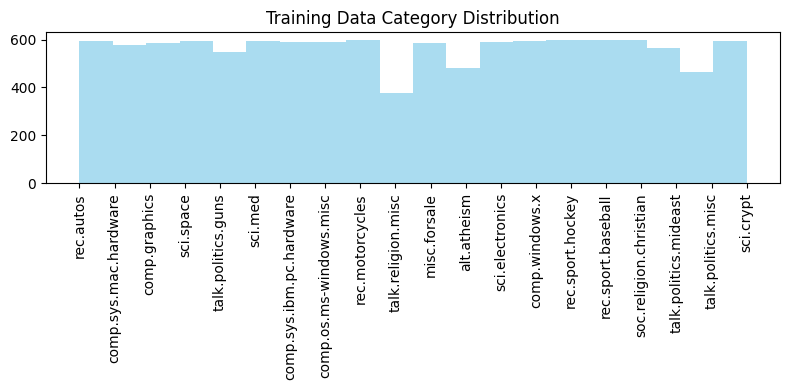

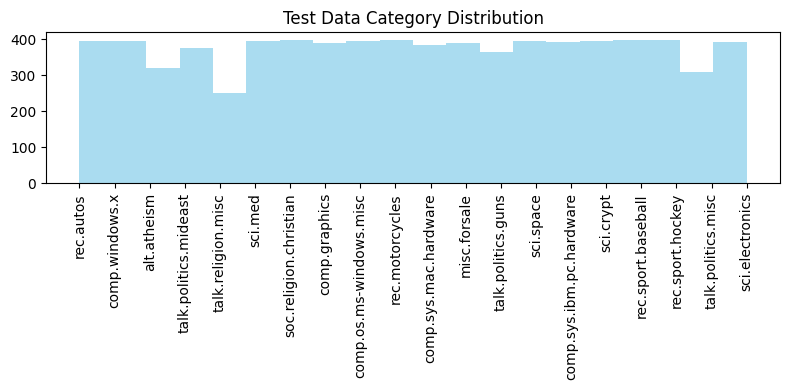

In [5]:
def plot_category_distribution(targets, target_names, title):
    plt.figure(figsize=(8, 4))
    plt.hist([target_names[i] for i in targets], bins=len(target_names), color='skyblue', alpha=0.7)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot the distributions
plot_category_distribution(twenty_train.target, twenty_train.target_names, 'Training Data Category Distribution')
plot_category_distribution(twenty_test.target, twenty_test.target_names, 'Test Data Category Distribution')

In [6]:
# TfidfVectorizer with English stop words (filtering and tokenziing english stop_word)
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the data into vectorizer and transform the data to a TF-IDF representation
X_train = vectorizer.fit_transform(twenty_train.data)
y_train = twenty_train.target

# # Transform the test data to the same TF-IDF representation
X_test = vectorizer.transform(twenty_test.data)
y_test = twenty_test.target

print("Sample train data: " + str(X_train.data[:10]))
print("\n")
print("Sample test data : " + str(X_test.data[:10]))

Sample train data: [0.10043854 0.10634736 0.2245489  0.11869933 0.12504221 0.1614203
 0.09418459 0.16329311 0.14341273 0.13037295]


Sample test data : [0.10869057 0.1391881  0.28850381 0.13441131 0.16994893 0.11251655
 0.16554585 0.18025041 0.17028403 0.2855605 ]


<h1>Logistic Regression</h1>

In [7]:
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model_lr, X_train, y_train, cv=kf, scoring='accuracy')

print("Report from Logistic Reression Model : \n")
print("pred_test: " +str(y_pred_lr))
print("Cross-validation scores:", cross_val_scores)
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Cross-validation deviation: {np.std(cross_val_scores):.4f}")
print("*" * 50)

print(classification_report(y_test, y_pred_lr))

# print(accuracy_score(y_test_lr, y_pred_lr))

Report from Logistic Reression Model : 

pred_test: [ 7  1 19 ...  9 12  0]
Cross-validation scores: [0.74944764 0.74281927 0.73751657 0.73840035 0.72767462]
Mean Cross-validation accuracy: 0.7392
Standard Cross-validation deviation: 0.0071
**************************************************
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       319
           1       0.63      0.71      0.67       389
           2       0.66      0.63      0.64       394
           3       0.68      0.65      0.66       392
           4       0.75      0.69      0.72       385
           5       0.83      0.72      0.77       395
           6       0.76      0.79      0.77       390
           7       0.75      0.71      0.73       396
           8       0.48      0.81      0.61       398
           9       0.81      0.82      0.82       397
          10       0.90      0.86      0.88       399
          11       0.89      0.67      0.76       396
     

<h1>Decision Tree Classifier</h1>

In [8]:
# Initialize Decision Tree Classifier
model_dtc = DecisionTreeClassifier(random_state=34)

model_dtc.fit(X_train, y_train)

y_pred_dtc = model_dtc.predict(X_test)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model_dtc, X_train, y_train, cv=kf, scoring='accuracy')

print("Report from Decision Tree Classifier : \n")
print("pred_test: " +str(y_pred_dtc))
print("Cross-validation scores:", cross_val_scores)
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Cross-validation deviation: {np.std(cross_val_scores):.4f}")
print("*" * 50)

print(classification_report(y_test, y_pred_dtc, target_names=twenty_test.target_names))

Report from Decision Tree Classifier : 

pred_test: [16  8 14 ...  9  6 15]
Cross-validation scores: [0.48608042 0.48077773 0.45603182 0.48342908 0.47082228]
Mean Cross-validation accuracy: 0.4754
Standard Cross-validation deviation: 0.0110
**************************************************
                          precision    recall  f1-score   support

             alt.atheism       0.27      0.27      0.27       319
           comp.graphics       0.41      0.45      0.43       389
 comp.os.ms-windows.misc       0.42      0.41      0.41       394
comp.sys.ibm.pc.hardware       0.41      0.39      0.40       392
   comp.sys.mac.hardware       0.47      0.44      0.45       385
          comp.windows.x       0.54      0.47      0.50       395
            misc.forsale       0.52      0.55      0.54       390
               rec.autos       0.27      0.55      0.36       396
         rec.motorcycles       0.56      0.51      0.53       398
      rec.sport.baseball       0.51      0.52  

<h1>Linear SVC</h1>

In [9]:
model_svc = LinearSVC()

model_svc.fit(X_train, y_train)

y_pred_svc = model_svc.predict(X_test)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model_svc, X_train, y_train, cv=kf, scoring='accuracy')

print("Report from Linear SVC : \n")
print("pred_test: " +str(y_pred_svc))
print("Cross-validation scores:", cross_val_scores)
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Cross-validation deviation: {np.std(cross_val_scores):.4f}")
print("*" * 50)

print(classification_report(y_test, y_pred_svc, target_names= twenty_test.target_names))

Report from Linear SVC : 

pred_test: [ 4  1  2 ...  9 12  0]
Cross-validation scores: [0.76447194 0.76226248 0.75342466 0.76535572 0.755084  ]
Mean Cross-validation accuracy: 0.7601
Standard Cross-validation deviation: 0.0049
**************************************************
                          precision    recall  f1-score   support

             alt.atheism       0.55      0.49      0.52       319
           comp.graphics       0.68      0.74      0.71       389
 comp.os.ms-windows.misc       0.62      0.62      0.62       394
comp.sys.ibm.pc.hardware       0.63      0.65      0.64       392
   comp.sys.mac.hardware       0.73      0.70      0.71       385
          comp.windows.x       0.83      0.70      0.76       395
            misc.forsale       0.73      0.78      0.76       390
               rec.autos       0.74      0.71      0.73       396
         rec.motorcycles       0.78      0.75      0.77       398
      rec.sport.baseball       0.55      0.85      0.66      

<h1>AdaBoostClassifier</h1>


In [10]:
model_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model_ada, X_train, y_train, cv=kf, scoring='accuracy')

print("Report from Ada Boost Classifier : \n")
print("pred_test: " +str(y_pred_ada))
print("Cross-validation scores:", cross_val_scores)
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Cross-validation deviation: {np.std(cross_val_scores):.4f}")
print("*" * 50)

print(classification_report(y_test, y_pred_ada, target_names=twenty_test.target_names))


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

Report from Ada Boost Classifier : 

pred_test: [12 12 12 ... 12  6 15]
Cross-validation scores: [0.39858595 0.41316836 0.38488732 0.39151569 0.39124668]
Mean Cross-validation accuracy: 0.3959
Standard Cross-validation deviation: 0.0097
**************************************************
                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       319
           comp.graphics       0.62      0.23      0.34       389
 comp.os.ms-windows.misc       0.64      0.39      0.49       394
comp.sys.ibm.pc.hardware       0.48      0.32      0.38       392
   comp.sys.mac.hardware       0.65      0.36      0.47       385
          comp.windows.x       0.73      0.41      0.53       395
            misc.forsale       0.74      0.52      0.61       390
               rec.autos       0.79      0.38      0.51       396
         rec.motorcycles       0.92      0.33      0.49       398
      rec.sport.baseball       0.75      0.19      

<h1>Random Forest Classifier</h1>

In [11]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model_rf, X_train, y_train, cv=kf, scoring='accuracy')

print("Report from Random Forest Classifier : \n")
print("pred_test: " +str(y_pred_rf))
print("Cross-validation scores:", cross_val_scores)
print(f"Mean Cross-validation accuracy: {np.mean(cross_val_scores):.4f}")
print(f"Standard Cross-validation deviation: {np.std(cross_val_scores):.4f}")
print("*" * 50)

# Evaluate the classifier performance
print(classification_report(y_test, y_pred_rf, target_names=twenty_test.target_names))

Report from Random Forest Classifier : 

pred_test: [ 4  1 17 ... 10  6 15]
Cross-validation scores: [0.68802475 0.67874503 0.66195316 0.6699072  0.66534041]
Mean Cross-validation accuracy: 0.6728
Standard Cross-validation deviation: 0.0095
**************************************************
                          precision    recall  f1-score   support

             alt.atheism       0.45      0.37      0.40       319
           comp.graphics       0.58      0.58      0.58       389
 comp.os.ms-windows.misc       0.55      0.63      0.59       394
comp.sys.ibm.pc.hardware       0.56      0.57      0.57       392
   comp.sys.mac.hardware       0.65      0.66      0.65       385
          comp.windows.x       0.63      0.68      0.65       395
            misc.forsale       0.70      0.75      0.72       390
               rec.autos       0.42      0.69      0.52       396
         rec.motorcycles       0.71      0.70      0.70       398
      rec.sport.baseball       0.64      0.79  

## Comparison of Models

Model: Logistic Regression with Accuracy: 0.6909187466808284
Model: Decision Tree Classifier with Accuracy: 0.4425119490175252
Model: Linear SVC with Accuracy: 0.692777482740308
Model: AdaBoost Classifier with Accuracy: 0.3659054699946893
Model: Random Forest Classifier with Accuracy: 0.6233404142326076


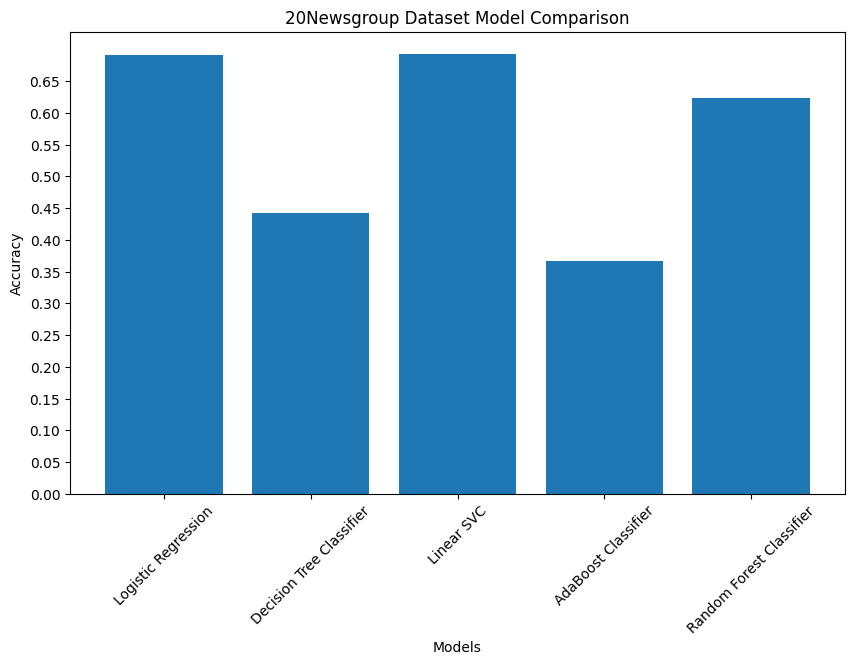

In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Linear SVC": LinearSVC(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

accuracies = []
model_names = []

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    model_names.append(name)  # Add the model name to the list
    print(f"Model: {name} with Accuracy: {acc}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(accuracies), step=0.05)) # Adjusting the y-axis tick size
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('20Newsgroup Dataset Model Comparison')
plt.show()

Model: Logistic Regression with Cross-Validation Accuracy: 73.92%
Model: Decision Tree Classifier with Cross-Validation Accuracy: 47.66%
Model: Linear SVC with Cross-Validation Accuracy: 76.01%
Model: AdaBoost Classifier with Cross-Validation Accuracy: 39.59%
Model: Random Forest Classifier with Cross-Validation Accuracy: 67.02%


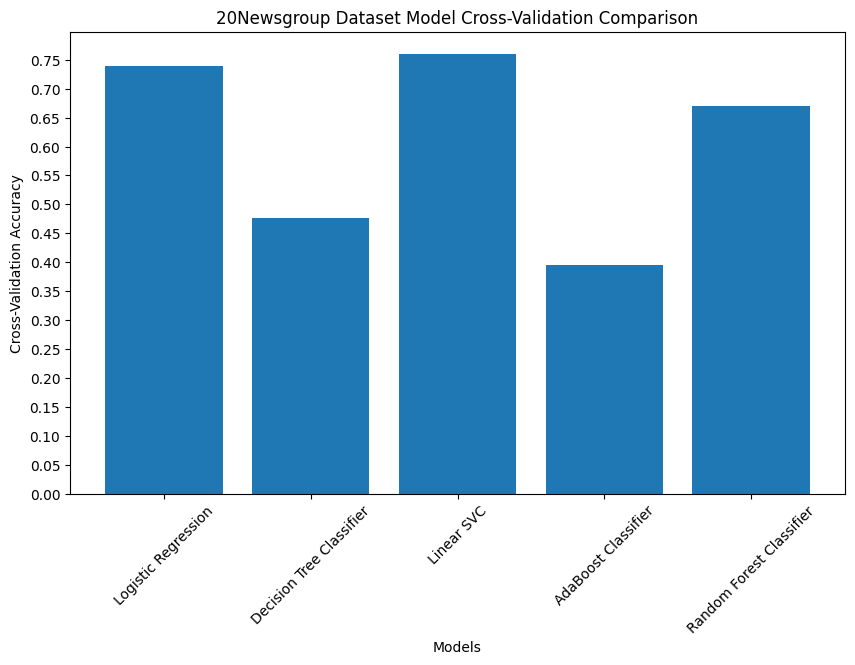

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Linear SVC": LinearSVC(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

cross_val_accuracies = []
model_names = []

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)
    # Evaluate
    k_folds = 5
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    cross_val_accuracies.append(np.mean(cross_val_acc))
    model_names.append(name)  # Add the model name to the list
    print(f"Model: {name} with Cross-Validation Accuracy: {np.mean(cross_val_acc) * 100:.2f}%")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, cross_val_accuracies)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(cross_val_accuracies), step=0.05)) # Adjusting the y-axis tick size
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('20Newsgroup Dataset Model Cross-Validation Comparison')
plt.show()

# IMDB Dataset

In [15]:
CLASSES = ['neg', 'pos']
PATH=Path('/kaggle/input/movies/aclImdb')
#PATH=Path('Desktop/CP322/aclImdb/aclImdb') # edit this for the appropriate file path
def read_text_file(path):
    texts, labels = [], []
    for id, label in enumerate(CLASSES):
        for file in (path/label).glob('*.*'):
          texts.append(file.open('r', encoding='utf-8').read())
          labels.append(id)
    return texts, labels
    

In [16]:
train_text, train_labels = read_text_file(PATH/'train')
test_text, test_labels = read_text_file(PATH/'test') 

In [17]:
def remove_special_chars(text):
  re1 = re.compile(r'  +')
  text = text.replace('<br />', '\n').replace('@', ' ').replace('$', 'dollar')
  return re1.sub(' ', html.unescape(text))

def remove_non_ascii(text):
  return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def to_lower(text):
  return text.lower()

def remove_punctuation(text):
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  return re_punc.sub('', text)

def replace_numbers(text):
  return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
  return text.strip()

def remove_stopwords(words, stop_words):
  return [word for word in words if word not in stop_words]

def stem_words(words):
  stemmer = PorterStemmer()
  return [stemmer.stem(word) for word in words]

def lemmatize(words):
  lemmatizer = WordNetLemmatizer()
  lem_verb = [lemmatizer.lemmatize(word, pos='v') for word in words]
  lem_noun = [lemmatizer.lemmatize(word, pos='n') for word in lem_verb]
  lem_adv = [lemmatizer.lemmatize(word, pos='r') for word in lem_noun]
  lem_adj = [lemmatizer.lemmatize(word, pos='a') for word in lem_adv]
  return ' '.join(lem_adj)

def text2words(text):
  return word_tokenize(text)

In [18]:
def normalize_text(text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lower(text)
    text = replace_numbers(text)
    words = remove_whitespaces(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    words = stem_words(words) # stem or lemmatize 
    #words = lemmatize(words)

    return ' '.join(words)

In [19]:
normalize_text(train_text[0])

'film worst film rank high slasher movi take place univers seem hand student teacher dumber sack hammer fill good cathol priest sexual repress humor bad hair bad cloth dialogu clich hard believ abl predict line quot slash creativ seem revolv around stab peopl genitalia lack continu soundtrack charact deserv die bad recommend film fun time get case cheap beer friend watch laugh'

In [20]:
def normalize_data(corpus):
  return [normalize_text(sentence) for sentence in corpus]

In [21]:
norm_train_text = normalize_data(train_text)
norm_test_text = normalize_data(test_text)

In [22]:
vocab_sz = 10000
vectorizer = TfidfVectorizer(max_features=vocab_sz)
# tokenize and build vocab
vectorizer.fit(norm_train_text+norm_test_text)


x_train = vectorizer.transform(norm_train_text)
x_test = vectorizer.transform(norm_test_text)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [23]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [24]:
x_train, x_val, y_train_movie, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [25]:
# Function to perform training and evaluation
def train_and_evaluate(model, x_train, y_train, x_val, y_val):
    
    model.fit(x_train, y_train) # Training

    # Predicting on validation set
    y_pred = model.predict(x_val)
    
    k_folds = 5
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
    avg_cross_val = np.mean(cross_val_scores)
    dev_cross_val = np.std(cross_val_scores)

    # Evaluating the model
    accuracy = model.score(x_val, y_val)
    report = classification_report(y_val, y_pred)
    
    return accuracy, cross_val_scores, avg_cross_val, dev_cross_val, report

## IMDB Logistic Regression

In [26]:
lr_model = LogisticRegression()
lr_accuracy, lr_cv_scores, lr_cv_avg, lr_cv_dev, lr_report = train_and_evaluate(lr_model,x_train, y_train_movie, x_val, y_val)

# Printing the results
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Cross-Validation Scores:", lr_cv_scores)
print("Logistic Cross-Validation Average Accuracy:", lr_cv_avg)
print("Logistic Cross-Validation Accuracy Deviation:", lr_cv_dev)
print("Logistic Regression Report:", lr_report)

Logistic Regression Accuracy: 0.8811
Logistic Cross-Validation Scores: [0.87366667 0.878      0.87566667 0.87933333 0.87566667]
Logistic Cross-Validation Average Accuracy: 0.8764666666666667
Logistic Cross-Validation Accuracy Deviation: 0.0019843834754849367
Logistic Regression Report:               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      5038
         1.0       0.86      0.90      0.88      4962

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## IMDB Decision Tree

In [27]:
dt_model = DecisionTreeClassifier()
dt_accuracy, dt_cv_scores, dt_cv_avg, dt_cv_dev, dt_report = train_and_evaluate(dt_model, x_train, y_train_movie, x_val, y_val)

# Printing the results
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree Cross-Validation Average Accuracy:", dt_cv_avg)
print("Decision Tree Cross-Validation Accuracy Deviation:", dt_cv_dev)
print("Decision Tree Tree Report:", dt_report)

Decision Tree Accuracy: 0.7102
Decision Tree Cross-Validation Scores: [0.70433333 0.702      0.70166667 0.69266667 0.70466667]
Decision Tree Cross-Validation Average Accuracy: 0.7010666666666667
Decision Tree Cross-Validation Accuracy Deviation: 0.004368574646774908
Decision Tree Tree Report:               precision    recall  f1-score   support

         0.0       0.71      0.71      0.71      5038
         1.0       0.71      0.71      0.71      4962

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



## IMDB SVC

In [28]:
svm_model = LinearSVC()
svm_accuracy, svm_cv_scores, svm_cv_avg, svm_cv_dev, svm_report = train_and_evaluate(svm_model, x_train, y_train_movie, x_val, y_val)

print("SVM Accuracy:", svm_accuracy)
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("SVM Cross-Validation Average Accuracy:", svm_cv_avg)
print("SVM Cross-Validation Accuracy Deviation:", svm_cv_dev)
print("SVM Report:", svm_report)

SVM Accuracy: 0.8743
SVM Cross-Validation Scores: [0.86433333 0.86966667 0.86333333 0.874      0.869     ]
SVM Cross-Validation Average Accuracy: 0.8680666666666668
SVM Cross-Validation Accuracy Deviation: 0.0038724095283887176
SVM Report:               precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      5038
         1.0       0.86      0.89      0.88      4962

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



## IMDB AdaBoost

In [29]:
ada_model = AdaBoostClassifier()
ada_accuracy, ada_cv_scores, ada_cv_avg, ada_cv_dev, ada_report = train_and_evaluate(ada_model, x_train, y_train_movie, x_val, y_val)

print("AdaBoost Accuracy:", ada_accuracy)
print("AdaBoost Cross-Validation Scores:", ada_cv_scores)
print("AdaBoost Cross-Validation Average Accuracy:", ada_cv_avg)
print("AdaBoost Cross-Validation Accuracy Deviation:", ada_cv_dev)
print("AdaBoost Report:", ada_report)

AdaBoost Accuracy: 0.8035
AdaBoost Cross-Validation Scores: [0.79733333 0.79366667 0.807      0.80733333 0.80733333]
AdaBoost Cross-Validation Average Accuracy: 0.8025333333333334
AdaBoost Cross-Validation Accuracy Deviation: 0.0058598445182255505
AdaBoost Report:               precision    recall  f1-score   support

         0.0       0.83      0.76      0.80      5038
         1.0       0.78      0.85      0.81      4962

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



## IMDB Random Forest

In [30]:
rf_model = RandomForestClassifier()
rf_accuracy, rf_cv_scores, rf_cv_avg, rf_cv_dev, rf_report = train_and_evaluate(rf_model, x_train, y_train_movie, x_val, y_val)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Cross-Validation Average Accuracy:", rf_cv_avg)
print("Random Forest Cross-Validation Accuracy Deviation:", rf_cv_dev)
print("Random Forest Report:", rf_report)

Random Forest Accuracy: 0.8433
Random Forest Cross-Validation Scores: [0.83366667 0.833      0.84233333 0.84133333 0.83733333]
Random Forest Cross-Validation Average Accuracy: 0.8375333333333334
Random Forest Cross-Validation Accuracy Deviation: 0.003821576172791099
Random Forest Report:               precision    recall  f1-score   support

         0.0       0.84      0.85      0.85      5038
         1.0       0.85      0.84      0.84      4962

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



## Comparison of Models

Model: Logistic Regression with Accuracy: 0.8811
Model: Decision Tree Classifier with Accuracy: 0.7065
Model: Linear SVC with Accuracy: 0.8743
Model: AdaBoost Classifier with Accuracy: 0.8035
Model: Random Forest Classifier with Accuracy: 0.8449


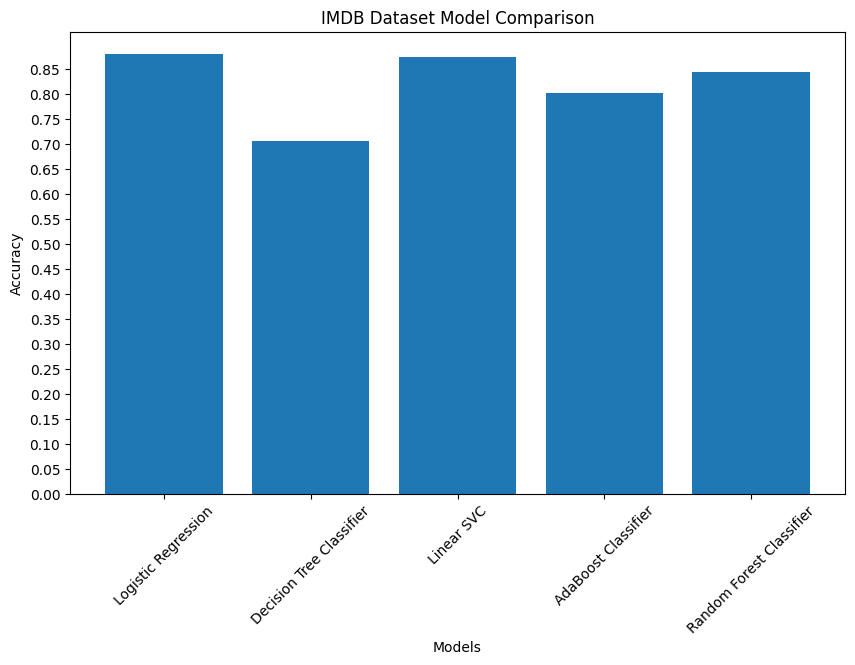

In [31]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Linear SVC": LinearSVC(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

accuracies = []
model_names = []

for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train_movie)
    # Predict
    y_pred = model.predict(x_val)
    # Evaluate
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)
    model_names.append(name)  # Add the model name to the list
    print(f"Model: {name} with Accuracy: {acc}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(accuracies), step=0.05)) # Adjusting the y-axis tick size
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('IMDB Dataset Model Comparison')
plt.show()

Model: Logistic Regression with Cross-Validation Accuracy: 87.65%
Model: Decision Tree Classifier with Cross-Validation Accuracy: 70.11%
Model: Linear SVC with Cross-Validation Accuracy: 86.81%
Model: AdaBoost Classifier with Cross-Validation Accuracy: 80.25%
Model: Random Forest Classifier with Cross-Validation Accuracy: 83.64%


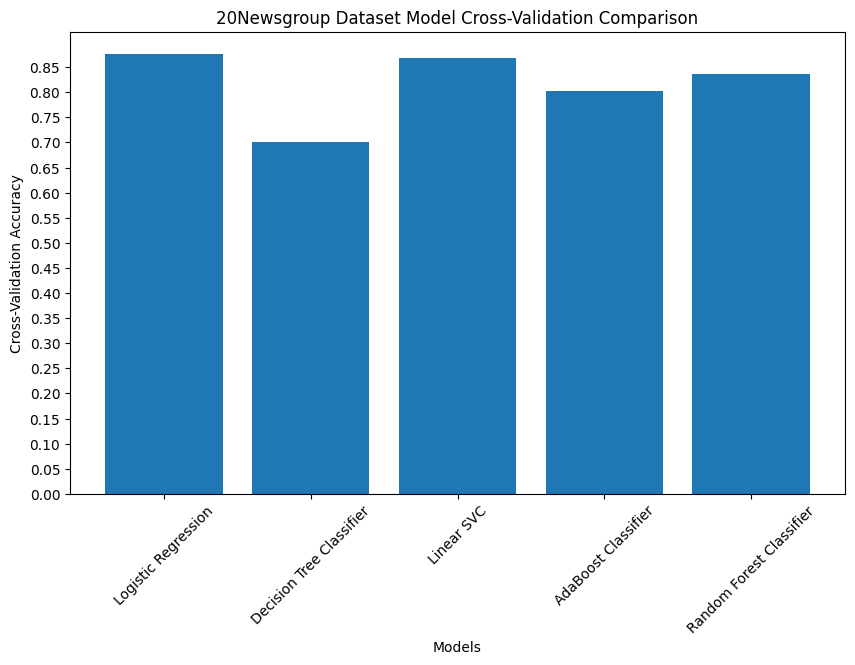

In [32]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Linear SVC": LinearSVC(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

cross_val_accuracies = []
model_names = []

for name, model in models.items():
    # Fit the model
    model.fit(x_train, y_train_movie)
    # Predict
    y_pred = model.predict(x_val)
    # Evaluate
    k_folds = 5
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    cross_val_acc = cross_val_score(model, x_train, y_train_movie, cv=kf, scoring='accuracy')
    cross_val_accuracies.append(np.mean(cross_val_acc))
    model_names.append(name)  # Add the model name to the list
    print(f"Model: {name} with Cross-Validation Accuracy: {np.mean(cross_val_acc) * 100:.2f}%")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, cross_val_accuracies)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, max(cross_val_accuracies), step=0.05)) # Adjusting the y-axis tick size
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('20Newsgroup Dataset Model Cross-Validation Comparison')
plt.show()